# Project Summary: Predicting Price Range and Cost for Restaurants

## 1. Problem Definition
The project involves building machine learning models to:
1. **Predict the Price range** of restaurants based on various features such as aggregate ratings, votes, location, and the processed `Cost in INR for two`.
2. **Predict the Cost in INR for two** using features like aggregate ratings, votes, and restaurant characteristics.
3. **Process and handle the skewness in the Cost in INR for two** column to use it as both a target variable and as a feature for predicting the `Price range`.

---

## 2. Data Preprocessing

### 2.1 Handling Missing Values
- We identified and handled missing values appropriately by either imputing or removing incomplete data.

### 2.2 Encoding Categorical Features
- **Binary Encoding**: For categorical columns such as `Has Table booking`, `Has Online delivery`, and `Is delivering now`, we encoded the responses (Yes/No) as 1/0.
- **City Encoding**: We encoded the `City` column into numerical values for modeling purposes.

### 2.3 Handling Skewness in Cost
- The `Cost in INR for two` column exhibited significant skewness, so we applied the following techniques:
  - **IQR Outlier Removal**: Removed extreme outliers using the Interquartile Range (IQR) method.
  - **Log Transformation**: Applied log transformation to reduce skewness and make the distribution more normal.

---

## 3. Feature Engineering

The following features were used for both models (predicting `Price range` and `Cost in INR for two`):

- **Aggregate rating**
- **log_votes** (log-transformed votes to reduce skewness)
- **location_cluster** (geographic clustering based on longitude and latitude)
- **Has Table booking (Encoded)**, **Has Online delivery (Encoded)**, **Is delivering now (Encoded)**
- **City (Encoded)**
- **Cost in INR for two** (processed version with skewness handled)

---

## 4. Modeling

### 4.1 Model for Predicting Price Range
- We used a **Random Forest Classifier** to predict the `Price range` of restaurants.
- The processed `Cost in INR for two` was used as a feature to improve predictions for the `Price range`.

### 4.2 Model for Predicting Cost in INR for two
- We used a **Random Forest Regressor** to predict the `Cost in INR for two`, treating it as a continuous target variable.
- Features like `Aggregate rating`, `Votes`, `Location`, and other restaurant characteristics were used for prediction.

### 4.3 Train-Test Split
- We split the data into training (80%) and testing (20%) sets to evaluate model performance.

### 4.4 Feature Scaling
- We scaled the numerical features using `StandardScaler` to normalize them and improve model performance.

---

## 5. Model Evaluation

### 5.1 Price Range Model Performance
- **Accuracy**: The Random Forest Classifier achieved an accuracy of **96.86%**.
- **Classification Report**:
  - High precision, recall, and F1-scores were observed for the most frequent classes (Price range 1 and 2).
  - Slightly lower performance was noted for Price range 3 and 4, which could be addressed with further tuning or class balancing.

### 5.2 Cost in INR for two Model Performance
- **Mean Squared Error (MSE)**: The Random Forest Regressor yielded an MSE of **539,516**.
- **R-Squared (R²)**: The model achieved an R² score of **0.7557**, meaning it explains about 75.57% of the variance in `Cost in INR for two`.

---

## 6. Hyperparameter Tuning
For both models, we recommended using **GridSearchCV** or **RandomizedSearchCV** to optimize the following hyperparameters:
- **n_estimators**: Number of trees in the forest.
- **max_depth**: Maximum depth of the trees.
- **min_samples_split** and **min_samples_leaf**: Minimum number of samples required to split a node or create a leaf.

---

## 7. Predictions for New Data

### Predicting Price Range
1. **Preprocess the new data**: Apply the same transformations (e.g., scaling, encoding, log transformation) as used during training.
2. **Make predictions**: Use the trained **Random Forest Classifier** to predict the price range for new restaurants using the `.predict()` method.

### Predicting Cost in INR for Two
1. **Preprocess the new data**: Apply the same transformations as done during training.
2. **Make predictions**: Use the trained **Random Forest Regressor** to predict the cost for two people using the `.predict()` method.

---

## 8. Conclusion

### Price Range Prediction
- The model for predicting `Price range` performed well with high accuracy and balanced precision/recall for most classes. Further tuning can be done to improve predictions for less frequent classes.

### Cost Prediction
- The model for predicting `Cost in INR for two` showed good performance, with moderate MSE and R² values. There is room for improvement through further feature engineering and hyperparameter tuning.
- The processed `Cost in INR for two` was successfully used as a feature in the `Price range` prediction model after addressing skewness.

---


In [1]:
import pandas as pd
path="C:\\Users\\Athar\\Downloads\\zomato.csv"
df=pd.read_csv(path,encoding='ISO-8859-1')

In [2]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [4]:
df['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [5]:
exchange_rates = {
    'Dollar($)': 83.00,  # Example: 1 USD = 83 INR
    'Indian Rupees(Rs.)': 1.0,  # 1 INR = 1 INR
    'Brazilian Real(R$)': 17.00,  # Example: 1 BRL = 17 INR
    'Emirati Diram(AED)': 22.55,  # 1 AED = 22.55 INR
    'Indonesian Rupiah(IDR)': 0.0053,  # 1 IDR = 0.0053 INR
    'NewZealand($)': 49.0,  # 1 NZD = 49 INR
    'Pounds(£)': 103.35,  # 1 GBP = 103.35 INR
    'Qatari Rial(QR)': 22.7,  # 1 QAR = 22.7 INR
    'Rand(R)': 4.4,  # 1 ZAR = 4.4 INR
    'Sri Lankan Rupee(LKR)': 0.26,  # 1 LKR = 0.26 INR
    'Turkish Lira(TL)': 3.9,  # 1 TRY = 3.9 INR
    'Botswana Pula(P)': 6.2  # 1 BWP = 6.2 INR
}

# Function to convert cost to Indian Rupees
def convert_to_inr(row):
    currency = row['Currency']
    cost = row['Average Cost for two']
    return cost * exchange_rates.get(currency, 1)

# Create a new column 'Cost in INR'
df['Cost in INR'] = df.apply(convert_to_inr, axis=1)
df['Cost in INR'] 

0        6820.0
1        7440.0
2       24800.0
3        9300.0
4        9300.0
         ...   
9546      312.0
9547      409.5
9548      663.0
9549      468.0
9550      214.5
Name: Cost in INR, Length: 9551, dtype: float64

In [6]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost in INR
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,6820.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,7440.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,24800.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,9300.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,9300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,312.0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,409.5
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,663.0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,468.0


In [7]:
df['Restaurant Name'].nunique()

7446

In [8]:
# Get column names
print(df.columns)

# Get detailed information about each column (type, non-null count, etc.)
print(df.info())


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cost in INR'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude

In [9]:
#finding non numerical columns
df_non_numerical_values=df.select_dtypes(exclude=['number']).columns
df_non_numerical_values

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [10]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Cost in INR             0
dtype: int64

In [11]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost in INR
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,6820.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,7440.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,24800.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,9300.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,9300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,312.0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,409.5
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,663.0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,468.0


In [12]:

df['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [13]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [14]:
import pandas as pd

# Sample dataset with rating text and aggregate rating
# Assuming 'Rating text' is the text column and 'Aggregate rating' is the numerical column
# Grouping by 'Rating text' to see the average, min, and max of 'Aggregate rating' for each category
rating_mapping = df.groupby('Rating text')['Aggregate rating'].agg(['mean', 'min', 'max']).reset_index()

# Display the mapping of 'Rating text' with 'Aggregate rating'
print(rating_mapping)


  Rating text      mean  min  max
0     Average  3.051619  2.5  3.4
1   Excellent  4.659801  4.5  4.9
2        Good  3.683429  3.5  3.9
3   Not rated  0.000000  0.0  0.0
4        Poor  2.297849  1.8  2.4
5   Very Good  4.168119  4.0  4.4


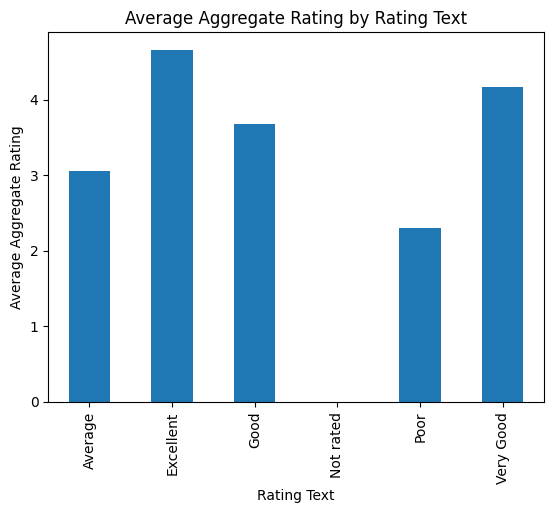

In [15]:
import matplotlib.pyplot as plt

# Plot the mean ratings for each Rating text category
rating_mapping.plot(kind='bar', x='Rating text', y='mean', legend=False)
plt.title('Average Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Aggregate Rating')
plt.show()


In [16]:
df=df.drop(columns=['Rating text'])

In [17]:
# Get unique cities
unique_cities = df['City'].unique()
print(f"Unique cities: {len(unique_cities)}")
print(unique_cities)


Unique cities: 141
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland Station' 'Waterloo'
 'Weirton' 'Winchester Bay' 'Yorkton' 'Abu Dhabi' 'Dubai' 'Shar

In [18]:
# Count of restaurants by city
city_counts = df['City'].value_counts()
print(city_counts)


City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [19]:
avg_cost_per_city=df.groupby('City')['Cost in INR'].mean().sort_values(ascending=False)
print(avg_cost_per_city.head(10))

City
Pasay City          20666.666667
Singapore           12927.250000
Mandaluyong City    12400.000000
Taguig City         10695.000000
Paynesville          9960.000000
Tagaytay City        7440.000000
Makati City          7130.000000
Princeton            5810.000000
Vineland Station     5810.000000
Pasig City           5786.666667
Name: Cost in INR, dtype: float64


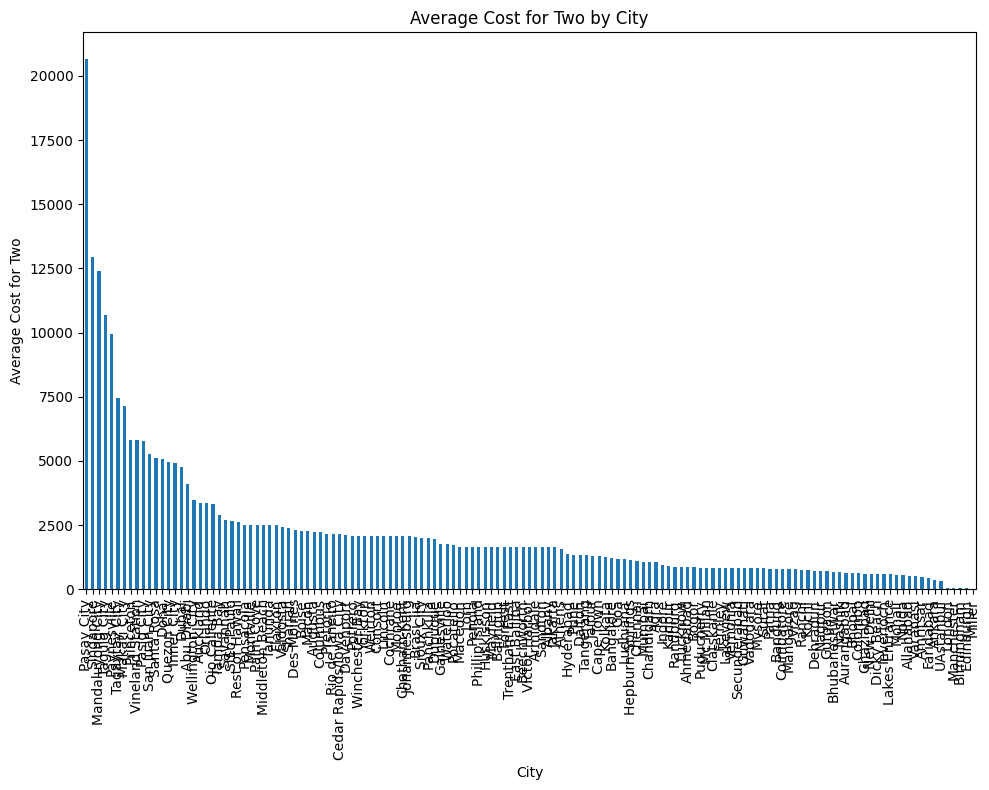

In [20]:
plt.figure(figsize=(10, 8))
avg_cost_per_city.plot(kind='bar', title='Average Cost for Two by City')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping labels
plt.show()

In [21]:
# List of columns that are one-hot encoded (starting with 'City_')
one_hot_columns = [col for col in df.columns if col.startswith('City_')]

# Drop the one-hot encoded columns from the DataFrame
df = df.drop(columns=one_hot_columns)

# View the updated DataFrame to confirm the one-hot encoded columns are removed


df_new=df.copy()
columns_to_drop = ['Address', 'Locality', 'Locality Verbose', 'Switch to order menu', 'Rating color']
df_new=df_new.drop(columns=columns_to_drop)
df_new

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,314,6820.0
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,591,7440.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,270,24800.0
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,365,9300.0
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,229,9300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,788,312.0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,1034,409.5
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,661,663.0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,901,468.0


In [32]:
# Drop the 'Average Cost for two' column as it is redundant after conversion to INR

df_new = df_new.rename(columns={'Cost in INR': 'Cost in INR for two'})

# View the updated DataFrame to confirm the column is removed
df_new


,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,0.0,0.0,No,3,4.8,314,6820.0
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,0.0,0.0,No,3,4.5,591,7440.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,0.0,0.0,No,4,4.4,270,24800.0
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,0.0,0.0,No,4,4.9,365,9300.0
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,0.0,0.0,No,4,4.8,229,9300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,80,0.0,0.0,No,3,4.1,788,312.0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,0.0,0.0,No,3,4.2,1034,409.5
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,0.0,0.0,No,4,3.7,661,663.0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,0.0,0.0,No,4,4.0,901,468.0


In [23]:
df_new['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [24]:
# Calculate the correlation between 'Price range' and 'Cost in INR for two'
correlation = df_new['Price range'].corr(df_new['Cost in INR for two'])
print(f'Correlation between Price range and Cost in INR for two: {correlation}')

correlation = df_new['Votes'].corr(df_new['Cost in INR for two'])
print(f'Correlation between Price range and Cost in INR for two: {correlation}')


Correlation between Price range and Cost in INR for two: 0.5579834378860719
Correlation between Price range and Cost in INR for two: 0.18729006177944213


In [41]:
df_new['Has Table booking']=df['Has Table booking']
df_new['Has Online delivery']=df['Has Online delivery']
print(df_new['Has Table booking'].unique())
print(df_new['Has Online delivery'].unique())

['Yes' 'No']
['No' 'Yes']


In [46]:
df_new['Has Table booking']=df['Has Table booking']
df_new['Has Online delivery']=df['Has Online delivery']
df_new


,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,314,6820.0
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Yes,No,No,3,4.5,591,7440.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,270,24800.0
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,4,4.9,365,9300.0
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,4,4.8,229,9300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,80,No,No,No,3,4.1,788,312.0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,3,4.2,1034,409.5
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,4,3.7,661,663.0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,No,No,No,4,4.0,901,468.0


In [59]:
from sklearn.cluster import KMeans
df_k=df_new
# Define the number of clusters
n_clusters = 10  # You can adjust this number based on your dataset size

# Prepare latitude and longitude for clustering
coordinates = df_k[['Latitude', 'Longitude']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_k['location_cluster'] = kmeans.fit_predict(coordinates)

# Check the cluster assignments
print(df_k[['Latitude', 'Longitude', 'location_cluster']].head(100))
print(df_k['location_cluster'].unique())

     Latitude   Longitude  location_cluster
0   14.565443  121.027535                 8
1   14.553708  121.014101                 8
2   14.581404  121.056831                 8
3   14.585318  121.056475                 8
4   14.584450  121.057508                 8
..        ...         ...               ...
95  31.607700  -84.222800                 1
96  31.618500  -84.222900                 1
97  31.613700  -84.216400                 1
98  31.611800  -84.223300                 1
99  31.605882  -84.205025                 1

[100 rows x 3 columns]
[8 4 1 3 6 0 2 7 5 9]


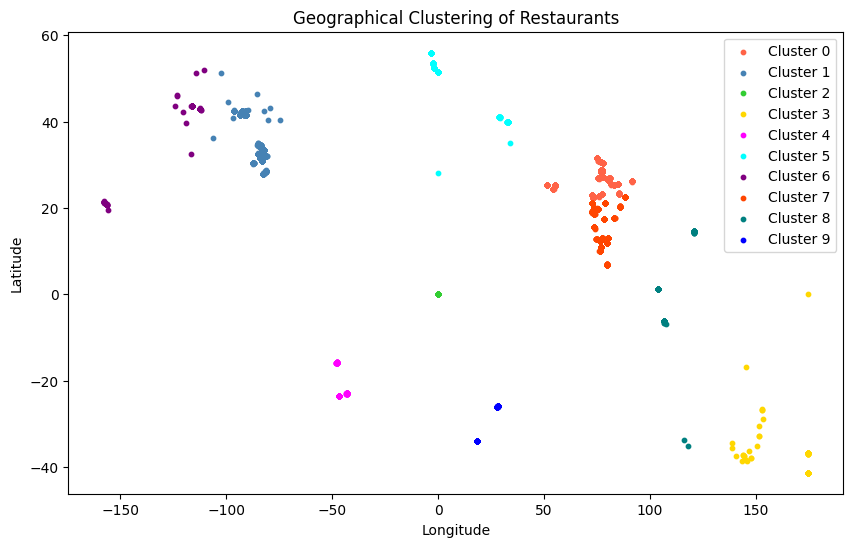

In [61]:
import matplotlib.pyplot as plt

# Define colors for the clusters
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF00FF', 
          '#00FFFF', '#800080', '#FF4500', '#008080', '#0000FF']

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for i in range(10):  # Assuming you have 10 clusters
    cluster_data = df_k[df_k['location_cluster'] == i]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], 
                s=10, c=colors[i], label=f'Cluster {i}')

# Add title and labels
plt.title('Geographical Clustering of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend to differentiate clusters
plt.legend(loc='best')

# Show plot
plt.show()


In [62]:
df_k

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two,location_cluster
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,314,6820.0,8
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Yes,No,No,3,4.5,591,7440.0,8
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,270,24800.0,8
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,4,4.9,365,9300.0,8
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,4,4.8,229,9300.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,80,No,No,No,3,4.1,788,312.0,5
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,3,4.2,1034,409.5,5
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,4,3.7,661,663.0,5
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,No,No,No,4,4.0,901,468.0,5


In [65]:
df_k=df_k.drop(columns=['Average Cost for two'])


In [66]:
df_k['Has Table booking'].isnull().sum()

0

In [67]:
df_k['Has Online delivery'].isnull().sum()

0

In [68]:
df_k['Is delivering now'].isnull().sum()

0

In [69]:
df_map=df_k
df_map['Has Table booking']

0       Yes
1       Yes
2       Yes
3        No
4       Yes
       ... 
9546     No
9547     No
9548     No
9549     No
9550     No
Name: Has Table booking, Length: 9551, dtype: object

In [71]:
# Create a mapping dictionary for encoding
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to encode the 'Has Table booking' column
df_map['Has Table booking (Encoded)'] = df_map['Has Table booking'].map(mapping)

# Verify the new column
print(df_map[['Has Table booking', 'Has Table booking (Encoded)']].head())

df_map['Has Online delivery (Encoded)'] = df_map['Has Online delivery'].map(mapping)

# Verify the new column
print(df_map[['Has Online delivery', 'Has Online delivery (Encoded)']].head())

df_map['Is delivering now (Encoded)'] = df_map['Is delivering now'].map(mapping)

# Verify the new column
print(df_map[['Is delivering now', 'Is delivering now (Encoded)']].head())


  Has Table booking  Has Table booking (Encoded)
0               Yes                            1
1               Yes                            1
2               Yes                            1
3                No                            0
4               Yes                            1
  Has Online delivery  Has Online delivery (Encoded)
0                  No                              0
1                  No                              0
2                  No                              0
3                  No                              0
4                  No                              0
  Is delivering now  Is delivering now (Encoded)
0                No                            0
1                No                            0
2                No                            0
3                No                            0
4                No                            0


In [72]:
df_map

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two,location_cluster,Has Table booking (Encoded),Has Online delivery (Encoded),Is delivering now (Encoded)
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,No,3,4.8,314,6820.0,8,1,0,0
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,Yes,No,No,3,4.5,591,7440.0,8,1,0,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,No,4,4.4,270,24800.0,8,1,0,0
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",No,No,No,4,4.9,365,9300.0,8,0,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",Yes,No,No,4,4.8,229,9300.0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,No,No,No,3,4.1,788,312.0,5,0,0,0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",No,No,No,3,4.2,1034,409.5,5,0,0,0
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",No,No,No,4,3.7,661,663.0,5,0,0,0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,No,No,No,4,4.0,901,468.0,5,0,0,0


In [79]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
label_encoder = LabelEncoder()
df_map['City (Encoded)'] = label_encoder.fit_transform(df_map['City'])
df_map.head(100)

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two,location_cluster,Has Table booking (Encoded),Has Online delivery (Encoded),Is delivering now (Encoded),City (Encoded)
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,No,3,4.8,314,6820.0,8,1,0,0,73
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,Yes,No,No,3,4.5,591,7440.0,8,1,0,0,73
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,No,4,4.4,270,24800.0,8,1,0,0,75
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",No,No,No,4,4.9,365,9300.0,8,0,0,0,75
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",Yes,No,No,4,4.8,229,9300.0,8,1,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17284175,Locos Grill & Pub,216,Albany,-84.222800,31.607700,"American, Burger, Sandwich",No,No,No,2,3.5,57,2075.0,1,0,0,0,3
96,17284179,Longhorn Steakhouse,216,Albany,-84.222900,31.618500,"American, Steak",No,No,No,2,3.5,58,2075.0,1,0,0,0,3
97,17284197,Mikata Japanese Steakhouse,216,Albany,-84.216400,31.613700,"Japanese, Steak, Sushi",No,No,No,3,3.6,115,3320.0,1,0,0,0,3
98,17284241,Shogun Japanese Steak House,216,Albany,-84.223300,31.611800,"Japanese, Steak, Sushi",No,No,No,3,3.5,51,3320.0,1,0,0,0,3


In [77]:

# Updated feature selection
X = df_map[['Country Code', 'Price range', 'Aggregate rating', 'Votes', 
          'location_cluster', 'Has Table booking (Encoded)', 
          'Has Online delivery (Encoded)', 'Is delivering now (Encoded)', 
          'City (Encoded)']]

# Target variable remains the same
y = df_k['Cost in INR for two']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 506658.4551693625
R-Squared: 0.7705349997402549


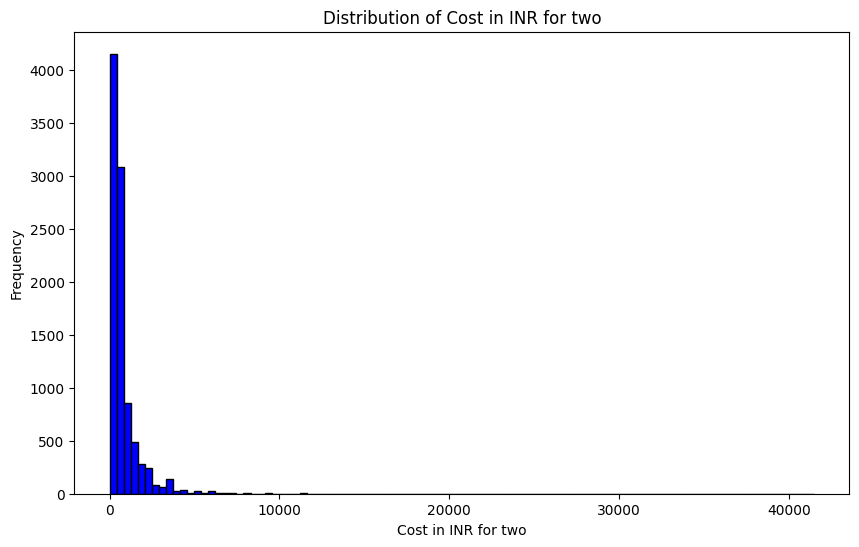

In [89]:
import matplotlib.pyplot as plt

# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df_k['Cost in INR for two'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Cost in INR for two')
plt.xlabel('Cost in INR for two')
plt.ylabel('Frequency')
plt.show()


C:\Users\Athar\AppData\Local\Temp\ipykernel_15928\3917295704.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_k['Cost in INR for two'], shade=True, color="blue")


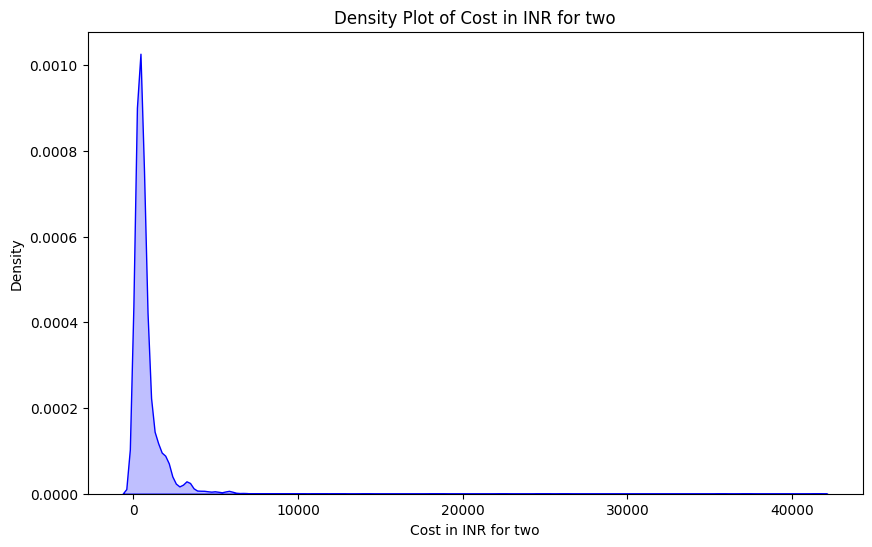

In [82]:
import seaborn as sns

# Plot a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_k['Cost in INR for two'], shade=True, color="blue")
plt.title('Density Plot of Cost in INR for two')
plt.xlabel('Cost in INR for two')
plt.show()


In [90]:
skewness = df_k['Cost in INR for two'].skew()
print(f"Skewness: {skewness}")


Skewness: 12.796642899335232


In [91]:
kurtosis = df_k['Cost in INR for two'].kurtosis()
print(f"Kurtosis: {kurtosis}")


Kurtosis: 285.23255356651384


In [95]:
Q1 = df_map['Cost in INR for two'].quantile(0.25)
Q3 = df_map['Cost in INR for two'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points beyond 1.5 * IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_k_no_outliers = df_map[(df_map['Cost in INR for two'] >= lower_bound) & (df_map['Cost in INR for two'] <= upper_bound)]

# Check skewness and kurtosis again after removing outliers
print(f"Skewness after removing outliers: {df_k_no_outliers['Cost in INR for two'].skew()}")
print(f"Kurtosis after removing outliers: {df_k_no_outliers['Cost in INR for two'].kurtosis()}")
df_k_no_outliers


Skewness after removing outliers: 1.1732588236104575
Kurtosis after removing outliers: 1.1368145722279057


,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Cost in INR for two,location_cluster,Has Table booking (Encoded),Has Online delivery (Encoded),Is delivering now (Encoded),City (Encoded),log_votes
22,6600681,Chez Michou,30,Brasí_lia,-47.881789,-15.764142,"Fast Food, French",No,No,No,2,3.0,6,935.0,4,0,0,0,21,1.945910
23,6601005,Cafí© Daniel Briand,30,Brasí_lia,-47.882667,-15.777500,Cafe,No,No,No,1,3.8,9,510.0,4,0,0,0,21,2.302585
24,6600292,Casa do Biscoito Mineiro,30,Brasí_lia,-47.882136,-15.757472,Bakery,No,No,No,2,3.7,11,765.0,4,0,0,0,21,2.484907
25,6600441,Maori,30,Brasí_lia,-47.888167,-15.758833,Brazilian,No,No,No,3,3.8,11,1020.0,4,0,0,0,21,2.484907
26,6600970,Pizza íæ Bessa,30,Brasí_lia,-47.915667,-15.831167,Pizza,No,No,No,2,3.2,11,850.0,4,0,0,0,21,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,No,No,No,3,4.1,788,312.0,5,0,0,0,140,6.670766
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",No,No,No,3,4.2,1034,409.5,5,0,0,0,140,6.942157
9548,5915807,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",No,No,No,4,3.7,661,663.0,5,0,0,0,140,6.495266
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,No,No,No,4,4.0,901,468.0,5,0,0,0,140,6.804615


In [93]:
# List of numerical columns to check
numerical_columns = ['Price range', 'Aggregate rating', 'Votes']  # Add other numerical columns as needed

# Check skewness and kurtosis for each numerical column
for col in numerical_columns:
    skewness = df_map[col].skew()
    kurtosis = df_map[col].kurtosis()
    print(f"{col}:")
    print(f"  Skewness: {skewness}")
    print(f"  Kurtosis: {kurtosis}")
    print("\n")


Price range:
  Skewness: 0.8896175931442
  Kurtosis: -0.1425502964503158


Aggregate rating:
  Skewness: -0.9541304733200109
  Kurtosis: -0.582217137282445


Votes:
  Skewness: 8.807636687709472
  Kurtosis: 128.22596890877097




In [94]:
df_map['log_votes'] = np.log1p(df_map['Votes'])  # Use log1p to handle zeros


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df_map is the updated dataset

# Select features for training
features = ['Price range', 'Aggregate rating', 'log_votes', 
            'location_cluster', 'Has Table booking (Encoded)', 
            'Has Online delivery (Encoded)', 'Is delivering now (Encoded)', 'City (Encoded)']

X = df_map[features]
y = df_map['Cost in INR for two']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 539516.4219629349
R-Squared: 0.755653666404366


In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R-Squared: {r2_best}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Mean Squared Error: 501011.16423532664
Best R-Squared: 0.7730926509595801


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr_model.fit(X_train_scaled, y_train)

y_pred_gbr = gbr_model.predict(X_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R-Squared: {r2_gbr}")


Gradient Boosting MSE: 478812.6683452369
Gradient Boosting R-Squared: 0.7831463228429058


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_map is the updated dataset with processed cost column

# Select features for training, including the processed 'Cost in INR for two'
features = ['Aggregate rating', 'log_votes', 'location_cluster', 
            'Has Table booking (Encoded)', 'Has Online delivery (Encoded)', 
            'Is delivering now (Encoded)', 'City (Encoded)', 'Cost in INR for two']  # Include processed cost

X = df_map[features]
y = df_map['Price range']  # Set Price range as the target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier (since Price range is categorical)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Evaluate the classification performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9686028257456829
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       907
           2       0.96      0.98      0.97       618
           3       0.92      0.91      0.91       266
           4       0.91      0.85      0.88       120

    accuracy                           0.97      1911
   macro avg       0.95      0.93      0.94      1911
weighted avg       0.97      0.97      0.97      1911



In [102]:
# Example of new data input (replace with actual data)
new_data = {
    'Aggregate rating': [4.5],
    'log_votes': [np.log1p(300)],  # Assuming the new restaurant has 300 votes, and log transformation was used
    'location_cluster': [3],
    'Has Table booking (Encoded)': [1],  # Yes = 1
    'Has Online delivery (Encoded)': [0],  # No = 0
    'Is delivering now (Encoded)': [0],  # No = 0
    'City (Encoded)': [75],  # Example city encoding
    'Cost in INR for two': [8000]  # Processed cost, where skewness was handled
}

# Convert to DataFrame
import pandas as pd
new_data_df = pd.DataFrame(new_data)

# Apply the same preprocessing steps used during training (e.g., scaling)
new_data_scaled = scaler.transform(new_data_df)

# Predict the price range for the new data
predicted_price_range = model.predict(new_data_scaled)

print(f"Predicted Price Range: {predicted_price_range[0]}")


Predicted Price Range: 4
